## General Exploratory Data Analysi

## General Exploratory Data Analysi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os.path
from datetime import datetime
from datetime import date
from dateutil import parser
#import pickle
#import asyncio
from datetime import timedelta
import dateutil.parser
import imp
import json
import statistics
#import random

#from binance.client import Client

#import api
#import get_uptodate_binance_data
#import generate_random_file
#import track_pnl

In [4]:
%%time

filename = 'BTCUSDT-1h-binance.csv'
timeframe = '1h'
OHLC_directory = '/root/OResearch/Data/Binance_OHLC/'
complete_file_path = OHLC_directory + filename
df = pd.read_csv(complete_file_path)

CPU times: user 38.9 ms, sys: 15.6 ms, total: 54.4 ms
Wall time: 170 ms


In [5]:
df

,Unnamed: 0,timestamp,open,high,low,close,volume,time_diff_in_days,time_diff_in_min
0,0,2017-08-17 04:00:00.000,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN
1,1,2017-08-17 05:00:00.000,4308.83,4328.69,4291.37,4315.32,23.234916,0.0,60.0
2,2,2017-08-17 06:00:00.000,4330.29,4345.45,4309.37,4324.35,7.229691,0.0,60.0
3,3,2017-08-17 07:00:00.000,4316.62,4349.99,4287.41,4349.99,4.443249,0.0,60.0
4,4,2017-08-17 08:00:00.000,4333.32,4377.85,4333.32,4360.69,0.972807,0.0,60.0
...,...,...,...,...,...,...,...,...,...
34576,34576,2021-08-01 20:00:00,41263.34,41500.00,41106.00,41258.65,2076.843599,0.0,60.0
34577,34577,2021-08-01 21:00:00,41258.65,41314.14,40926.09,41068.21,1139.681274,0.0,60.0
34578,34578,2021-08-01 22:00:00,41068.21,41192.60,40000.00,40268.63,4849.500775,0.0,60.0
34579,34579,2021-08-01 23:00:00,40273.36,40437.51,39422.01,39845.44,5041.730461,0.0,60.0


Deleting the 'Unnamed: 0' column

In [59]:
df = df.drop(columns=['Unnamed: 0'], axis=0)

Adding log-return

In [22]:
df['closeprice_log_return']=np.log(df.close) - np.log(df.close.shift(1))

In [97]:
df

,timestamp,open,high,low,close,volume,time_diff_in_days,time_diff_in_min,close_log_return,datetime,day,month,week
0,2017-08-17 04:00:00.000,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,NaN,2017-08-17 04:00:00,Thursday,August,33
1,2017-08-17 05:00:00.000,4308.83,4328.69,4291.37,4315.32,23.234916,0.0,60.0,0.001505,2017-08-17 05:00:00,Thursday,August,33
2,2017-08-17 06:00:00.000,4330.29,4345.45,4309.37,4324.35,7.229691,0.0,60.0,0.002090,2017-08-17 06:00:00,Thursday,August,33
3,2017-08-17 07:00:00.000,4316.62,4349.99,4287.41,4349.99,4.443249,0.0,60.0,0.005912,2017-08-17 07:00:00,Thursday,August,33
4,2017-08-17 08:00:00.000,4333.32,4377.85,4333.32,4360.69,0.972807,0.0,60.0,0.002457,2017-08-17 08:00:00,Thursday,August,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34576,2021-08-01 20:00:00,41263.34,41500.00,41106.00,41258.65,2076.843599,0.0,60.0,-0.000114,2021-08-01 20:00:00,Sunday,August,30
34577,2021-08-01 21:00:00,41258.65,41314.14,40926.09,41068.21,1139.681274,0.0,60.0,-0.004626,2021-08-01 21:00:00,Sunday,August,30
34578,2021-08-01 22:00:00,41068.21,41192.60,40000.00,40268.63,4849.500775,0.0,60.0,-0.019662,2021-08-01 22:00:00,Sunday,August,30
34579,2021-08-01 23:00:00,40273.36,40437.51,39422.01,39845.44,5041.730461,0.0,60.0,-0.010565,2021-08-01 23:00:00,Sunday,August,30


In [48]:
type(df['timestamp'])

pandas.core.series.Series

In [54]:
df['datetime'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [61]:
df['day'] = df['datetime'].dt.day_name()

In [82]:
df['week'] = df['datetime'].dt.week

In [74]:
df['month'] = df['datetime'].dt.month_name()

# We plot the average and median log_return by day, by week, and by month.

# by day

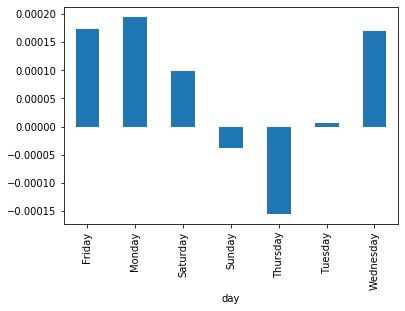

In [71]:
df[['day', 'close_log_return']].groupby('day').mean().plot(kind='bar', legend=None)

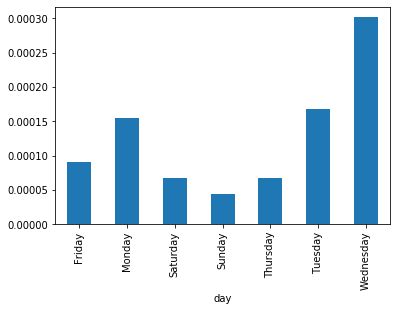

In [72]:
df[['day', 'close_log_return']].groupby('day').median().plot(kind='bar', legend=None)

# by week

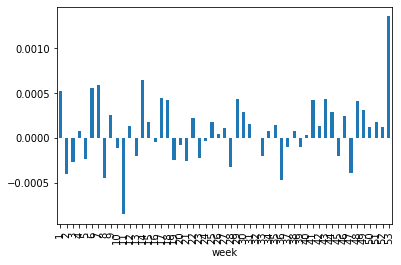

In [84]:
df[['week', 'close_log_return']].groupby('week').mean().plot(kind='bar', legend=None)

We can notice quite a pattern on the 53th calendar week. Explain more. (cause 53th week only exists in 2020 so it's biased: not big enough sample

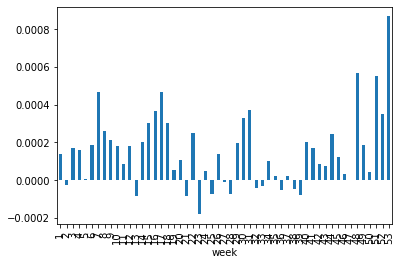

In [85]:
df[['week', 'close_log_return']].groupby('week').median().plot(kind='bar', legend=None)

Let's now look at extreme value or outliers among those

In [86]:
df[['week', 'close_log_return']].groupby('week').mean()

,close_log_return
week,
1,0.000525
2,-0.000409
3,-0.000271
4,0.000072
5,-0.000238
6,0.000559
7,0.000585
8,-0.000446
9,0.000252


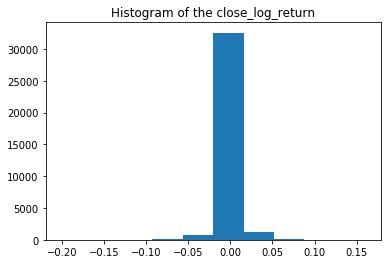

In [90]:
fig, ax = plt.subplots()
ax.hist(df.close_log_return)
plt.title('Histogram of the close_log_return')
plt.show()

Research for Extremal log-return

# by month

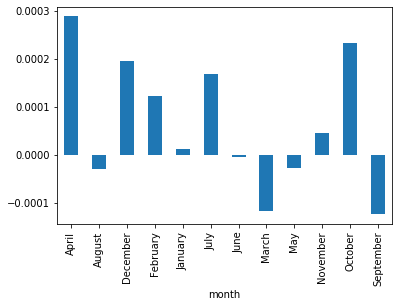

In [77]:
df[['month', 'close_log_return']].groupby('month').mean().plot(kind='bar', legend=None)

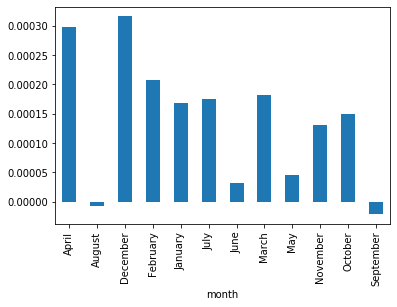

In [79]:
df[['month', 'close_log_return']].groupby('month').median().plot(kind='bar', legend=None)

# Analysing log-return by day, month, hour, etc